In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import constants as C
import plotting

%matplotlib widget

In [2]:
def symmetrize_txt_data(txt_name: str, name: str) -> edl.PotentialSweepSolution:
    data = np.loadtxt(txt_name, skiprows=5)
    data_potentials = np.concatenate([data[::-1, 0], -data[1:, 0]])
    chg0 = data[0, 1]
    data_chg = np.concatenate([data[::-1, 1], -data[1:, 1]+2*chg0]) / 100 
    data_cap = np.gradient(data_chg, data_potentials) * 100
    return edl.PotentialSweepSolution(phi=data_potentials, charge=data_chg, cap=data_cap, profiles=[], name=name)

gold_nano_sol = symmetrize_txt_data('comsol_data/70nm_gold_electrode_charge.txt', 'COMSOL 70nm metal/metal')
true_nano_sol = symmetrize_txt_data('comsol_data/70nm_nano_electrode_charge.txt', 'COMSOL 70nm metal/silica')
true_nano_sol.cap *= 4

Sweep from 0.01V to -1.00V. Maximum relative residual: 3.04195e-06.
Sweep from 0.01V to 1.00V. Maximum relative residual: 3.04194e-06.


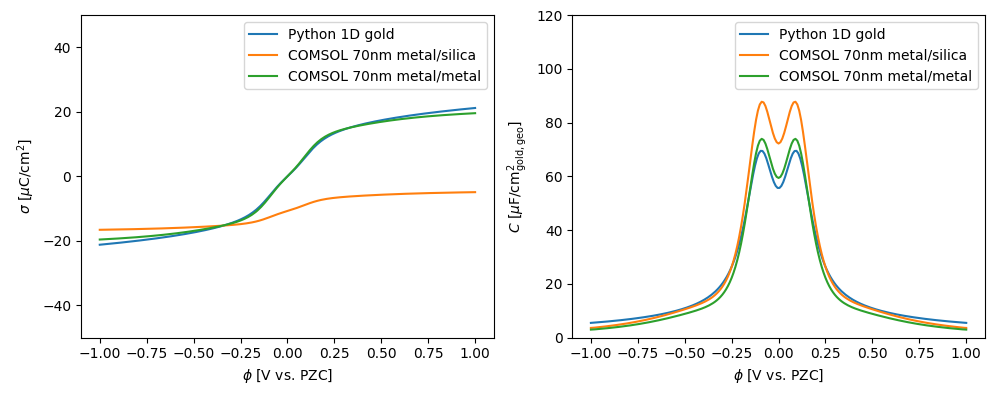

In [3]:
ph_lpb = edl.ProtonLPB(0.1, 6, 6, 6, 6)
ph_lpb_nsol = ph_lpb.potential_sweep(potential=np.linspace(-1, 1, 200), p_h=11, tol=1e-4)
ph_lpb_nsol.name = 'Python 1D gold'

fig, ax = plotting.plot_potential_sweep([ph_lpb_nsol, true_nano_sol, gold_nano_sol])
ax[1].set_ylim([0, 120])
ax[1].set_ylabel(r'$C$ [$\mu$F/cm$^2_\mathrm{gold,geo}$]')
plt.show()

##!! note: d_m has not been taken into account in electrode geometry yet